### Analytic solution of the problem
#### Bewegungsgleichungen / Nomenklatur

$
\begin{align*}
\overrightarrow{r} &= \begin{pmatrix}x\\y\end{pmatrix} \\
\overrightarrow{v} &= \frac{\partial \overrightarrow{r}}{\partial t}
&= \dot{\overrightarrow{r}} &= \begin{pmatrix}\dot{x}\\\dot{y}\end{pmatrix} \\
\overrightarrow{a} &= \frac{\partial \overrightarrow{v}}{\partial t} 
&= \dot{\overrightarrow{v}} &= \begin{pmatrix}\ddot{x}\\\ddot{y}\end{pmatrix} \\
\end{align*}
$

#### 1.)

$
\begin{align*}
\overrightarrow{F} &= m  \overrightarrow{a} \\
&= \begin{pmatrix}0\\- m  \overrightarrow{g}\end{pmatrix} \\
0 &= m \ddot{x} \\
-m  \overrightarrow{g} &= m \ddot{y} \\
\end{align*}
$

#### 2.)

$
\begin{align*}
0 &= m \ddot{x} \\
\ddot{x} &= 0 \\
\dot{x} &= C_1 \\
x &= C_1 t + C_2 \\ 
\\
-m  \overrightarrow{g} &= m \ddot{y} \\
\ddot{y} &= -g \\
\dot{y} &= -g t + C_3 \\
y &= - \frac{g}{2} t^2 + C_3 t + C_4 \\ 
\end{align*}
$

#### 3.)

$
\begin{align*}
x(0)   &= 0 \Rightarrow C_1 0 + C_2 = 0 &\Rightarrow C_2 = 0 \\ 
y(0)   &= 1 \Rightarrow - \frac{g}{2} 0^2 + C_3 0 + C_4 = 1 &\Rightarrow C_4 = 1 \\
\dot{x}(0)   &= v_x \Rightarrow C_1 0 &\Rightarrow C_1 = v_x \\ 
\dot{y}(0)   &= v_y \Rightarrow - g 0 + C_3  = v_y &\Rightarrow C_3 = v_y \\
\end{align*}
$

#### 4.)

$
\begin{align*}
\overrightarrow{r} 
= \begin{pmatrix}C_1 t + C2\\- \frac{g}{2} t^2 + C_3 t + C_4\end{pmatrix} 
= \begin{pmatrix}v_x t\\- \frac{g}{2} t^2 + v_y t + 1\end{pmatrix}
\end{align*}
$

<a id="herleitung"></a>

### Recalculating the last exercise (Numerical solution first order)
In the beginning we recalculate trajectory of the Ball with the numerical solver from the last exercise.


#### Adjustments to the algorithm used last time:
- This allows to stop the calulcation as soon as we hit the floor.
```python 
...
for step in range(number_of_steps):
    if tennis_ball.position[1] <= 0.0: break
    ...
...
```
- We save the used points in time, so we know where to calulcate the analytical solution.

```python 
...
trajectory_time = [] # an empty list to store the time
for step in range(number_of_steps):
    ...
    trajectory_time.append(step*time_step)
...
```


<a id="numerical_firstorder"></a>

<IPython.core.display.Javascript object>


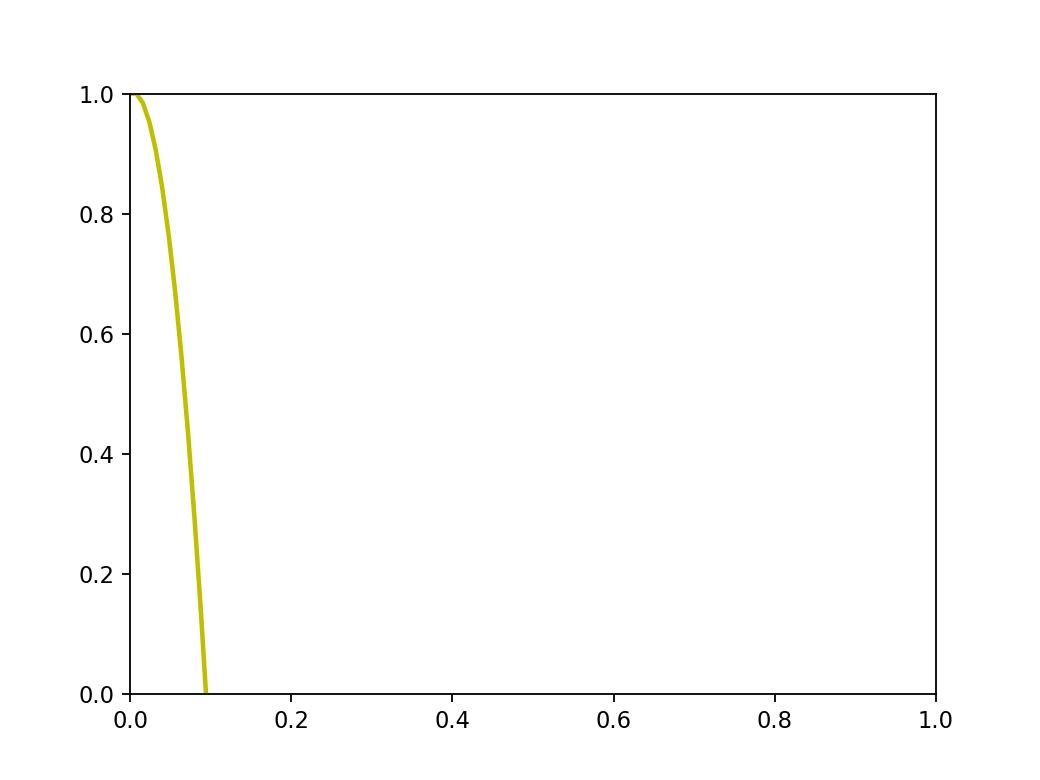

In [8]:
class Ball:
    def __init__(self, start_position, start_velocity, radius):
        self.position = start_position
        self.velocity = start_velocity
        self.radius = radius
    
    def move(self, time_step):
        self.position[0] += self.velocity[0] * time_step
        self.position[1] += self.velocity[1] * time_step
        
        self.velocity[0] += 0
        self.velocity[1] -= 9.81 * time_step
        if self.position[1] <= 0.0:
            self.velocity[1] *= -1
        
tennis_ball = Ball([0, 1], [0.2, 0], 0.033)
time_step = 0.04
number_of_steps = 1500

trajectory_numerical = []  # this is an empty list
trajectory_time = [] # also a empty list to store the time
for step in range(number_of_steps):
    trajectory_numerical.append(tennis_ball.position[:])  # append adds something at the end of a list
    trajectory_time.append(step*time_step)
    if tennis_ball.position[1] <= 0.0: break # stop the calculation here
    tennis_ball.move(time_step)
    
    
        
# don't worry about the code below too much it just crates an animation
# of your calculated positions.
from animation import animate
%matplotlib notebook

ani = animate(trajectory_numerical, time_step*100/0.04)

### Analytical solution
**Initialisation**
> We have first to define the starting position and velocity of our ball as in the [numerical example](#numerical_firstorder).

**Analytical solution**
> Then we can iterate over the saved points in time and calculate the analytical solution for this point and add it to the trajectory.
<div style="background:lightblue">
 Here you have to fill in the equations.
</div>

**Error calculation**
> To be able to better compare the numeric and analytic solution we calculate the squared error between them and then plot it.


<a id="analytic_firstorder"></a>

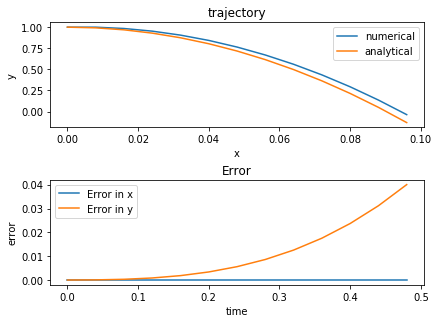

In [9]:
# Initialisation
start_position=[0, 1] # start position of the ball (as in the numeric example)
start_velocity=[0.2, 0] # start velocity of the ball (as in the numeric example)

# Analytical solution
trajectory_analytical = [] # an empty list to store the analytic results
for point_in_time in trajectory_time: # iterate of the timepoints
    position_x = start_position[0] + start_velocity[0] * point_in_time # fill in here
    position_y = start_position[1] - 0.5 * 9.81 * point_in_time**2 # fill in here
    trajectory_analytical.append([position_x,position_y]) # update trajectory
    
# Error calculation
error = []
error_x_sq=error_y_sq=0
for i in range(len(trajectory_analytical)):
    diff_x=trajectory_analytical[i][0]-trajectory_numerical[i][0]
    diff_y=trajectory_analytical[i][1]-trajectory_numerical[i][1]
    error_x_sq+=diff_x**2
    error_y_sq+=diff_y**2
    error.append([error_x_sq,error_y_sq])
    
# Plotting
from animation import plot
%matplotlib inline

plot(trajectory_time, trajectory_numerical,trajectory_analytical,error)



As you can see there is a difference between the numerical and analytical solution.

If you decrease the time step by a factor of 10 to:
```python
time_step = 0.004
```
and rerun the [numerical solution](#numerical_firstorder) and then [analytical solution](#analytic_firstorder) you will see that for the given height the curves look the same
but we still have a error between them which increases with increasing time / height

### Numerical solution second order
A more accurate solution can be provided by using a numerical integrator of higher order.

#### Taylor series
A Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. 
<div style="background:lightblue">
Note: see math script of Luik for more
</div>

One can use Taylor series to numericaly approximate functions by using a finite number of terms.
Here, we give as an example a 1-d Taylor series which was terminated after the third order term:

$
\begin{align*}
x(t + \Delta t) &= x(t) + \dot{x}(t) \Delta t + \frac{1}{2} \ddot{x}(t) (\Delta t)^2 + \frac{1}{3!} \dddot{x}(t) (\Delta t)^3 + \mathcal{O}(\Delta t ^ 4) \\
\end{align*}
$

If we now take the second order form and use it for our example we get:


$
\begin{align*}
x(t + \Delta t) &= x(t) 
+\dot{x}(t) \Delta t + \frac{1}{2} \ddot{x}(t) (\Delta t)^2 + \mathcal{O}(\Delta t ^ 3) \\
x(t + \Delta t) &= x(t) + v(t) \Delta t + \frac{F}{2 m} \Delta t^2 \\
\end{align*}
$

Since we have a constant force in both direction we get for the x-direction:

$
\begin{align*}
x(t + \Delta t) &= x(t) + v_x(t) \Delta t + \frac{F_x}{2 m} \Delta t^2 \\
x(t + \Delta t) &= x(t) + v_x(t) \Delta t &\textrm{with: }F_x=0 \\
\end{align*}
$

and in y-direction: 

$
\begin{align*}
y(t + \Delta t) &= y(t) + v_y(t) \Delta t + \frac{F_y}{2 m} \Delta t^2 \\
y(t + \Delta t) &= y(t) + v_y(t) \Delta t - \frac{g}{2} \Delta t^2 
&\textrm{with: }F_y=-g m \\
\end{align*}
$

This equations are implemented in the code below.
Which will now update the positions with a second order integrator
```python
self.position[0] += self.velocity[0] * time_step
self.position[1] += self.velocity[1] * time_step - 9.81 / 2.0 * time_step**2
```
and 
```python
time_step = 0.04
```

After this, the analytical solution is calculated again and compared.

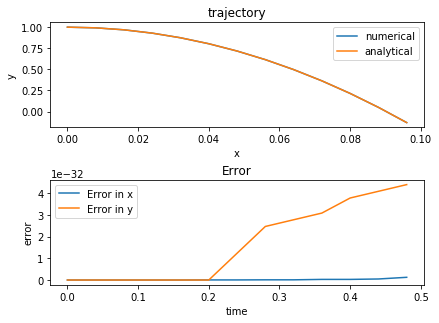

In [7]:
class Ball:
    def __init__(self, start_position, start_velocity, radius):
        self.position = start_position
        self.velocity = start_velocity
        self.radius = radius
    
    def move(self, time_step):
        self.position[0] += self.velocity[0] * time_step
        self.position[1] += self.velocity[1] * time_step - 9.81 / 2.0 * time_step**2

        self.velocity[0] += 0
        self.velocity[1] -= 9.81 * time_step
        if self.position[1] <= 0.0:
            self.velocity[1] *= -1
        
tennis_ball = Ball([0, 1], [0.2, 0], 0.033)
time_step = 0.04
number_of_steps = 1500

trajectory_numerical_2nd = []  # this is an empty list
trajectory_time = [] # also a empty list to store the time
for step in range(number_of_steps):
    trajectory_numerical_2nd.append(tennis_ball.position[:])  # append adds something at the end of a list
    trajectory_time.append(step*time_step)
    if tennis_ball.position[1] <= 0.0: break # stop the calculation here
    tennis_ball.move(time_step)
        
# don't worry about the code below too much it just crates an animation
# of your calculated positions.
from animation import animate
%matplotlib notebook

#ani = animate(trajectory_numerical, time_step*100/0.04)

trajectory_analytical = [] # an empty list to store the analytic results
start_position=[0, 1]
start_velocity=[0.2, 0]
for point_in_time in trajectory_time:
    position_x = start_position[0] + start_velocity[0] * point_in_time
    position_y = start_position[1] - 0.5 * 9.81 * point_in_time**2
    trajectory_analytical.append([position_x,position_y])
    

error = []
error_x_sq=error_y_sq=0
for i in range(len(trajectory_analytical)):
    diff_x=trajectory_analytical[i][0]-trajectory_numerical_2nd[i][0]
    diff_y=trajectory_analytical[i][1]-trajectory_numerical_2nd[i][1]
    error_x_sq+=diff_x**2
    error_y_sq+=diff_y**2
    error.append([error_x_sq,error_y_sq])
    
from animation import plot
%matplotlib inline

plot(trajectory_time, trajectory_numerical_2nd,trajectory_analytical,error)

This time the numerical solution and the analytical solution are identical (in the limits of the available precision).

So a second order integrator is already enough to describe this system.